In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('Military pay % increase.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,Military Pay Raises by President,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,President,President Nixon,President Nixon,President Ford,President Ford,President Ford,President Carter,President Carter,President Carter,President Carter,...,President Obama,President Obama,President Obama,President Obama,President Obama,President Trump,President Trump,President Trump,President Trump,President Biden
2,Year,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,Pay Raise,6.70%,6.20%,5.52%,5%,3.60%,6.20%,5.50%,7%,11.70%,...,1.70%,1.00%,1.00%,1.30%,2.10%,2.40%,2.60%,3.10%,3.00%,2.70%


In [3]:
df=df.transpose()

In [4]:
df.drop(0, axis=1, inplace=True)
df.head()

,1,2,3
0,President,Year,Pay Raise
1,President Nixon,1973,6.70%
2,President Nixon,1974,6.20%
3,President Ford,1975,5.52%
4,President Ford,1976,5%


In [5]:
df.columns = df.iloc[0]
df = df[1:]
df.head()

,President,Year,Pay Raise
1,President Nixon,1973,6.70%
2,President Nixon,1974,6.20%
3,President Ford,1975,5.52%
4,President Ford,1976,5%
5,President Ford,1977,3.60%


In [6]:
df.rename(columns = {'Pay Raise' : 'pay_raise'}, inplace=True)
df.columns = df.columns.str.lower()
df.head()

,president,year,pay_raise
1,President Nixon,1973,6.70%
2,President Nixon,1974,6.20%
3,President Ford,1975,5.52%
4,President Ford,1976,5%
5,President Ford,1977,3.60%


In [7]:
df.set_index('year', inplace=True)
df.head()

,president,pay_raise
year,,
1973,President Nixon,6.70%
1974,President Nixon,6.20%
1975,President Ford,5.52%
1976,President Ford,5%
1977,President Ford,3.60%


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1973 to 2022
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   president  50 non-null     object
 1   pay_raise  50 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [9]:
median=pd.read_csv('Median Household Income.csv')
median.head()

,USA Median Household Income 1984-2021,Unnamed: 1,Unnamed: 2
0,DATE,Median Household Income,mhi_change
1,1/1/1984,"$55,828.00",NaN
2,1/1/1985,"$56,871.00",1.8%
3,1/1/1986,"$58,920.00",3.5%
4,1/1/1987,"$59,624.00",1.2%


In [10]:
median.drop([0], axis=0, inplace=True)
median.head()

,USA Median Household Income 1984-2021,Unnamed: 1,Unnamed: 2
1,1/1/1984,"$55,828.00",NaN
2,1/1/1985,"$56,871.00",1.8%
3,1/1/1986,"$58,920.00",3.5%
4,1/1/1987,"$59,624.00",1.2%
5,1/1/1988,"$60,115.00",0.8%


In [11]:
median.rename(columns = {'USA Median Household Income 1984-2021':'year', 'Unnamed: 1':'median_household_income', 'Unnamed: 2':'mhi_change'}, inplace=True)
median.head()

,year,median_household_income,mhi_change
1,1/1/1984,"$55,828.00",NaN
2,1/1/1985,"$56,871.00",1.8%
3,1/1/1986,"$58,920.00",3.5%
4,1/1/1987,"$59,624.00",1.2%
5,1/1/1988,"$60,115.00",0.8%


In [12]:
median['year'] = pd.to_datetime(median['year']).dt.year
median.set_index('year', inplace=True)
median.head()

,median_household_income,mhi_change
year,,
1984,"$55,828.00",NaN
1985,"$56,871.00",1.8%
1986,"$58,920.00",3.5%
1987,"$59,624.00",1.2%
1988,"$60,115.00",0.8%


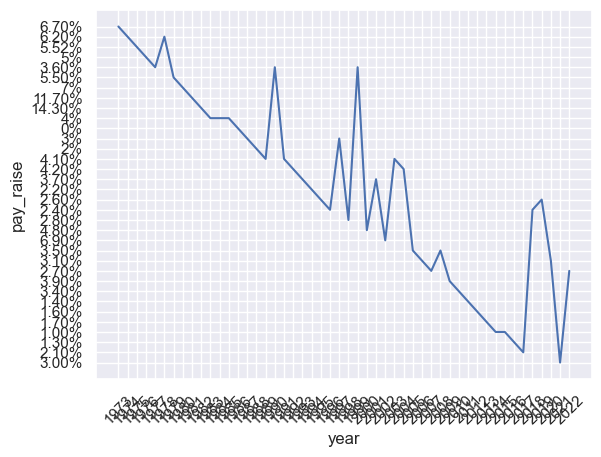

In [13]:
g=sns.lineplot(x=df.index, y=df['pay_raise'])
plt.xticks(rotation=45);

In [14]:
inflation=pd.read_csv('USA Inflation.csv')
inflation.head()

,year,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,inflation (annual),1.457976,1.070724,1.198773,1.239669,1.278912,1.585169,3.015075,2.772786,4.271796,...,2.069337,1.464833,1.622223,0.118627,1.261583,2.13011,2.442583,1.81221,1.233584,4.697859
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
inflation = inflation.transpose()
inflation

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
year,inflation (annual),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,1.457976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,1.070724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,1.198773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,1.239669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,2.13011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,2.442583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,1.81221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,1.233584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
inflation.columns = inflation.iloc[0]
inflation = inflation[1:]
inflation

year,inflation (annual),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,1.457976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,1.070724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,1.198773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,1.239669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,1.278912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,2.13011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,2.442583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,1.81221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,1.233584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
inflation.rename(columns = {'inflation (annual)': 'inflation'}, inplace=True)
inflation.dropna(axis=1, inplace=True)

C:\Users\bahar\anaconda3\envs\dashboard\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\bahar\anaconda3\envs\dashboard\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
inflation.index.rename('year', inplace=True)

In [19]:
df.info()
median.info()
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1973 to 2022
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   president  50 non-null     object
 1   pay_raise  50 non-null     object
dtypes: object(2)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1984 to 2021
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   median_household_income  38 non-null     object
 1   mhi_change               37 non-null     object
dtypes: object(2)
memory usage: 912.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1960 to 2021
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   inflation  62 non-null     object
dtypes: object(1)
memory usage: 992.0+ bytes


In [20]:
inflation.index=inflation.index.astype('int')
inflation.index.dtype

dtype('int64')

In [21]:
df.index=df.index.astype('int')

In [22]:
median.index=median.index.astype('int')

In [23]:
combined =pd.merge(df, median, on='year', how='outer')
combined.head()

,president,pay_raise,median_household_income,mhi_change
year,,,,
1973,President Nixon,6.70%,NaN,NaN
1974,President Nixon,6.20%,NaN,NaN
1975,President Ford,5.52%,NaN,NaN
1976,President Ford,5%,NaN,NaN
1977,President Ford,3.60%,NaN,NaN


In [24]:
combined.index=combined.index.astype('int')

In [25]:
combined=pd.merge(combined, inflation, on='year', how='inner')
combined.head()

,president,pay_raise,median_household_income,mhi_change,inflation
year,,,,,
1973,President Nixon,6.70%,NaN,NaN,6.17776
1974,President Nixon,6.20%,NaN,NaN,11.054805
1975,President Ford,5.52%,NaN,NaN,9.143147
1976,President Ford,5%,NaN,NaN,5.744813
1977,President Ford,3.60%,NaN,NaN,6.501684


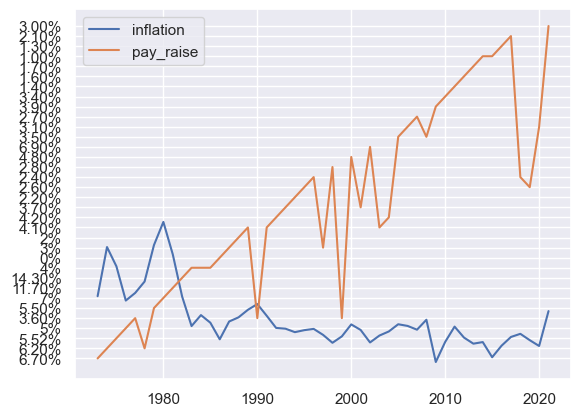

In [31]:
plt.plot(combined.index, combined.inflation, label = 'inflation')
plt.plot(combined.index, combined.pay_raise, label = 'pay_raise')
plt.legend();

In [33]:
combined.to_csv('combined.csv')

### going to manipulate and add more data as needed to the csv in excel and then visualize with power BI